In [20]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [23]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col='student number')

In [34]:
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [35]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df=pd.DataFrame({'english':en_scores,
                       'mathematics':ma_scores},
                      index=pd.Index(['A','B','C','D','E',
                                     'F','G','H','I','J'],
                                    name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [37]:
summary_df =scores_df.copy()
summary_df['english_deviation']=\
   summary_df['english']-summary_df['english'].mean()
summary_df['mathematics_deviation']=\
   summary_df['mathematics']-summary_df['mathematics'].mean()
summary_df['product of deviations']=\
   summary_df['english_deviation']*summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [39]:
summary_df['product of deviations'].mean()

62.800

In [40]:
cov_mat=np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [41]:
cov_mat[0,1],cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

In [42]:
cov_mat[0,0],cov_mat[1,1]

(86.0, 68.44000000000001)

In [43]:
np.var(en_scores), np.var(ma_scores)

(86.0, 68.44000000000001)

In [44]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/\
       (np.std(en_scores)*np.std(ma_scores))

0.8185692341186713

In [45]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [47]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

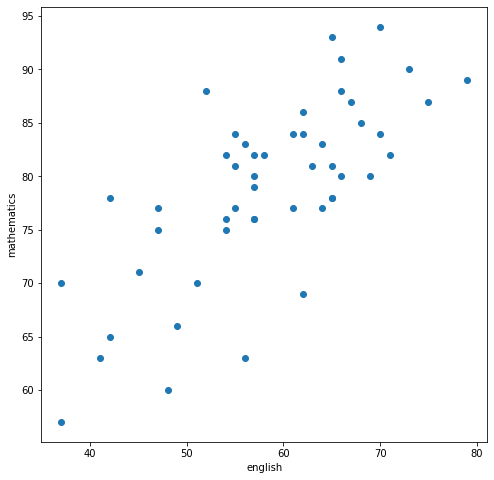

In [53]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

[ 1.195e-10 -7.057e-08  1.864e-05 -2.898e-03  2.938e-01 -2.029e+01
  9.665e+02 -3.135e+04  6.624e+05 -8.234e+06  4.571e+07]


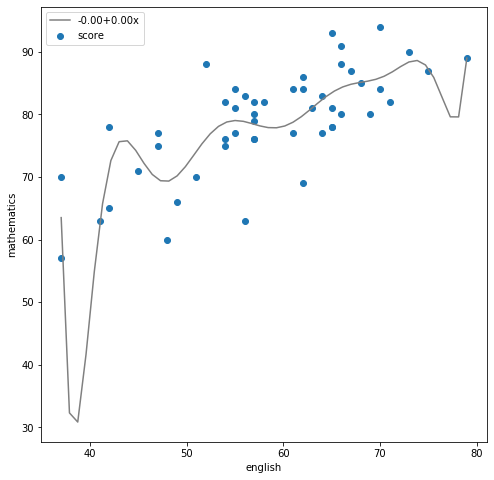

In [60]:
poly_fit = np.polyfit(english_scores, math_scores, 10)
print(poly_fit)
poly_1d = np.poly1d(poly_fit)

xs=np.linspace(english_scores.min(),english_scores.max())

ys = poly_1d(xs)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs,ys,color='gray',
      label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.legend(loc='upper left')

plt.show()

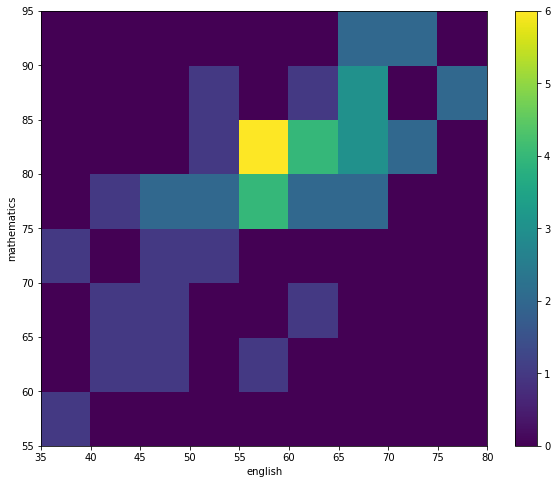

In [62]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

c=ax.hist2d(english_scores, math_scores,
           bins=[9,8],range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()


In [64]:
anscombe_data=np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

FileNotFoundError: [Errno 2] No such file or directory: './data/ch3_anscombe.npy'

In [74]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean',
                              'Y_variance','X&Y_correlation',
                              'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX=data[:,0]
    dataY=data[:,1]
    poly_fit = np.polyflt(dataX,dataY,1)
    stats_df[f'data{i+1}']=\
       [f'{np.mean(dataX):.2f}]',
        f'{np.var(dataX):.2f}',
        f'{np.var(dataY):.2f}',
        f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
        f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

NameError: name 'anscombe_data' is not defined

NameError: name 'anscombe_data' is not defined

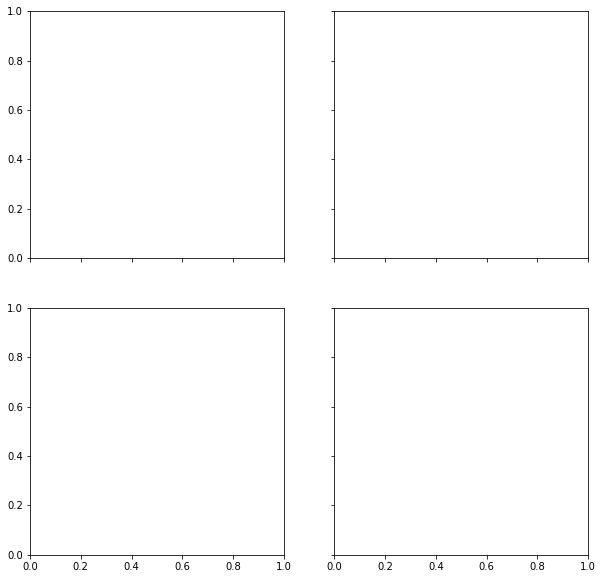

In [78]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10),
                         sharex=True, sharey=True)

xs=np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d=np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax=axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    ax.set_title(f'data(i+1)')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
    
plt.tight_layout()
plt.show()